# ECON 138 — Midterm Exam  
### *How Do Maternal and Child Health Outcomes Differ Across Southeast Asia?*

**Objective:**  
This exam will assess your ability to perform *exploratory data analysis (EDA)* and create *visual stories* using real-world microdata.  
You will use the **Demographic and Health Survey (DHS) Phase 7 – Birth Recode (BR)** datasets from Southeast Asian countries to compare maternal and child health outcomes.

## Backgound
The DHS provides nationally representative data on fertility, maternal and child health, and family planning.  
Each “BR” dataset contains one record per live birth reported by women aged 15–49.

| Country | DHS file | Phase | Year |
|----------|-----------|-------|------|
| Cambodia | `KHBR73FL.DTA` | 7 | 2014 |
| Indonesia | `IDBR71FL.DTA` | 7 | 2017 |
| Myanmar | `MMBR71FL.DTA` | 7 | 2016 |
| Philippines | `PHBR71FL.DTA` | 7 | 2017 |
| Timor-Leste | `TLBR71FL.DTA` | 7 | 2016 |

## Instructions

Your output should **not only consist of tables and charts**, but also **narrative insights and interpretations**.  
For every visualization or descriptive table you produce, include a short **Markdown discussion (2–4 sentences)** explaining:
- What the data show  
- How patterns differ across countries or socio-economic groups  
- What potential economic, demographic, or policy interpretations can be drawn  

These narratives are essential for demonstrating your understanding of the data and your ability to communicate findings effectively, similar to how economists write data briefs or empirical summaries.


## Data Preparation
1. Load each `.dta` file using `pandas.read_stata()`.  
2. Create a `country` column (e.g., “Cambodia”, “Indonesia”, etc.) and concatenate all countries into one DataFrame.  
3. Always use survey weights in summaries.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
import numpy as np
import os

In [2]:
#creating paths
path = os.getcwd()
data = path + "\\DHS_data\\"
kh_dta = data + "KH_2014_DHS_11032025_2324_233235\\KHBR73DT\\"
id_dta = data + "ID_2017_DHS_11032025_2329_233235\\IDBR71DT\\"
mm_dta = data + "MM_2015-16_DHS_11032025_2330_233235\\MMBR71DT\\"
ph_dta = data + "PH_2017_DHS_11032025_2331_233235\\PHBR71DT\\"
tl_dta = data + "TL_2016_DHS_11032025_2323_233235\\TLBR71DT\\"

In [3]:
#loading dta files
kh = pd.read_stata(kh_dta + "KHBR73FL.DTA", convert_categoricals = False)
id = pd.read_stata(id_dta + "IDBR71FL.DTA", convert_categoricals = False)
mm = pd.read_stata(mm_dta + "MMBR71FL.DTA", convert_categoricals = False)
ph = pd.read_stata(ph_dta + "PHBR71FL.DTA", convert_categoricals = False)
tl = pd.read_stata(tl_dta + "TLBR71FL.DTA", convert_categoricals = False)

#used convert_categoricals = False for easier data cleaning using dhs dictionary
#some dataframes won't load w/o convert_categoricals=False

In [4]:
#adding country column to the dataframes
kh['country'] = 'Cambodia'
id['country'] = 'Indonesia'
mm['country'] = 'Myanmar'
ph['country'] = 'Philippines'
tl['country'] = 'Timor-Leste'

C:\Users\User\AppData\Local\Temp\ipykernel_17884\2570278110.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kh['country'] = 'Cambodia'
C:\Users\User\AppData\Local\Temp\ipykernel_17884\2570278110.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  id['country'] = 'Indonesia'
C:\Users\User\AppData\Local\Temp\ipykernel_17884\2570278110.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

In [5]:
#de-fragmenting fragmented dataframes as per the suggestion of the warning above
kh = kh.copy()
id = id.copy()
mm = mm.copy()
ph = ph.copy()
tl = tl.copy()

In [6]:
#concatenating into one dataframe
df_list = [kh, id, mm, ph, tl]
df = pd.concat(df_list)

df

,caseid,bidx,v000,v001,v002,v003,v004,v005,v006,v007,...,s457bd,s457be,s457bf,s457bg,s457bh,s457bi,s457bx,s457bz,s466a,s507a
0,1 1 1,1,KH6,1,1,1,1,1335754,7,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 1 1,2,KH6,1,1,1,1,1335754,7,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 1 1,3,KH6,1,1,1,1,1335754,7,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 2 2,1,KH6,1,2,2,1,1335754,7,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 3 2,1,KH6,1,3,2,1,1335754,7,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28677,455 25 2,1,TL7,455,25,2,455,1135490,12,2016,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
28678,455 25 2,2,TL7,455,25,2,455,1135490,12,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28679,455 26 3,1,TL7,455,26,3,455,1135490,12,2016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
28680,455 26 3,2,TL7,455,26,3,455,1135490,12,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#filtering to retrieve only the needed variables
df = df.loc[:, ['caseid',
                'country',
                'v012',
                'v013',
                'v011',
                'b3',
                'v025',
                'v107',
                'v190',
                'bord',
                'v106',
                'v201',
                'm14',
                'm15',
                'm3n',
                'b5',
                'b6']]

df

,caseid,country,v012,v013,v011,b3,v025,v107,v190,bord,v106,v201,m14,m15,m3n,b5,b6
0,1 1 1,Cambodia,34,4,967,1367,2,4.0,3,3,1.0,3,9.0,32.0,0.0,1,NaN
1,1 1 1,Cambodia,34,4,967,1295,2,4.0,3,2,1.0,3,NaN,NaN,NaN,1,NaN
2,1 1 1,Cambodia,34,4,967,1251,2,4.0,3,1,1.0,3,NaN,NaN,NaN,1,NaN
3,1 2 2,Cambodia,37,5,928,1374,2,NaN,2,1,0.0,1,2.0,23.0,0.0,1,NaN
4,1 3 2,Cambodia,45,7,825,1229,2,2.0,4,4,2.0,4,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28677,455 25 2,Timor-Leste,28,3,1062,1379,2,5.0,1,2,2.0,2,6.0,22.0,0.0,1,NaN
28678,455 25 2,Timor-Leste,28,3,1062,1324,2,5.0,1,1,2.0,2,NaN,NaN,NaN,1,NaN
28679,455 26 3,Timor-Leste,29,3,1050,1379,2,5.0,2,3,1.0,3,1.0,11.0,1.0,1,NaN
28680,455 26 3,Timor-Leste,29,3,1050,1348,2,5.0,2,2,1.0,3,NaN,11.0,1.0,1,NaN


In [8]:
#manually putting labels for categorical variables

#dictionaries
v013_dict = {1: '15-19', 2: '20-24', 3: '25-29', 4: '30-34',
             5: '35-39', 6: '40-44', 7: '45-49'}
v025_dict = {'Urban': 1, 'Rural': 2}
v190_dict = {'Poorest': 1, 'Poorer': 2, 'Middle': 3, 'Richer': 4, 'Richest': 5}
v106_dict = {'No education': 0, 'Primary': 1, 'Secondary': 2, 'Higher': 3, 
             'Missing': 9}
v025_dict = {1: 'Urban', 2: 'Rural'}
v190_dict = {1: 'Poorest', 2: 'Poorer', 3: 'Middle', 4: 'Richer', 5: 'Richest'}
v106_dict = {0: 'No education', 1: 'Primary', 2: 'Secondary', 3: 'Higher', 
             9: 'Missing'}
m15_dict = {10: 'Home', 11: 'Home', 12: 'Home', 13: 'Home', 14: 'Home', 
            15: 'Home', 16: 'Home', 17: 'Home', 18: 'Home', 19: 'Home',
            20: 'Facility', 21: 'Facility', 22: 'Facility', 23: 'Facility', 
            24: 'Facility', 25: 'Facility', 26: 'Facility', 27: 'Facility', 
            28: 'Facility', 29: 'Facility', 30: 'Facility', 31: 'Facility', 
            32: 'Facility', 33: 'Facility', 34: 'Facility', 35: 'Facility', 
            36: 'Facility', 96: 'Facility'}
m3n_dict = {0: 'Had Assistance', 1: 'No Assistance'}
b5_dict = {0: 'No', 1: 'Yes'}

#mapping the dictionaries to respective columns
df['v013'] = df['v013'].map(v013_dict)
df['v025'] = df['v025'].map(v025_dict)
df['v190'] = df['v190'].map(v190_dict)
df['Highest Education Level - Woman'] = df['v106'].map(v106_dict)
df['m15'] = df['m15'].map(m15_dict)
df['m3n'] = df['m3n'].map(m3n_dict)
df['b5'] = df['b5'].map(b5_dict)

#turning NaN values in v107 into 0
df['v107'] = df['v107'].fillna(0)

df

,caseid,country,v012,v013,v011,b3,v025,v107,v190,bord,v106,v201,m14,m15,m3n,b5,b6,Highest Education Level - Woman
0,1 1 1,Cambodia,34,30-34,967,1367,Rural,4.0,Middle,3,1.0,3,9.0,Facility,Had Assistance,Yes,NaN,Primary
1,1 1 1,Cambodia,34,30-34,967,1295,Rural,4.0,Middle,2,1.0,3,NaN,NaN,NaN,Yes,NaN,Primary
2,1 1 1,Cambodia,34,30-34,967,1251,Rural,4.0,Middle,1,1.0,3,NaN,NaN,NaN,Yes,NaN,Primary
3,1 2 2,Cambodia,37,35-39,928,1374,Rural,0.0,Poorer,1,0.0,1,2.0,Facility,Had Assistance,Yes,NaN,No education
4,1 3 2,Cambodia,45,45-49,825,1229,Rural,2.0,Richer,4,2.0,4,NaN,NaN,NaN,Yes,NaN,Secondary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28677,455 25 2,Timor-Leste,28,25-29,1062,1379,Rural,5.0,Poorest,2,2.0,2,6.0,Facility,Had Assistance,Yes,NaN,Secondary
28678,455 25 2,Timor-Leste,28,25-29,1062,1324,Rural,5.0,Poorest,1,2.0,2,NaN,NaN,NaN,Yes,NaN,Secondary
28679,455 26 3,Timor-Leste,29,25-29,1050,1379,Rural,5.0,Poorer,3,1.0,3,1.0,Home,No Assistance,Yes,NaN,Primary
28680,455 26 3,Timor-Leste,29,25-29,1050,1348,Rural,5.0,Poorer,2,1.0,3,NaN,Home,No Assistance,Yes,NaN,Primary


In [9]:
#renaming column names for better readability
df.rename(columns = {'v012': 'Age',
                     'v013': 'Age Group',
                     'v011': 'Date of Birth(CMC) - Woman',
                     'b3': 'Date of Birth(CMC) - Child',
                     'v025': 'Residence Type',
                     'v107': 'Years of Education',
                     'v190': 'Wealth Index Combined',
                     'bord': 'Birth Order',
                     'v106': 'Highest Educational Level(numerical) - Woman',
                     'v201': 'Total Births',
                     'm14': 'Antenatal Visits',
                     'm15': 'Place of Delivery',
                     'm3n': 'Assistance: no one',
                     'b5': 'Child is Alive',
                     'b6': 'Age at Death'}, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218470 entries, 0 to 28681
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   caseid                                        218470 non-null  object 
 1   country                                       218470 non-null  object 
 2   Age                                           218470 non-null  int8   
 3   Age Group                                     218470 non-null  object 
 4   Date of Birth(CMC) - Woman                    218470 non-null  int16  
 5   Date of Birth(CMC) - Child                    218470 non-null  int16  
 6   Residence Type                                218470 non-null  object 
 7   Years of Education                            218470 non-null  float64
 8   Wealth Index Combined                         218470 non-null  object 
 9   Birth Order                                   218470 n

# Tasks

### A. Maternal Demographics
1. Plot a **histogram** and **kernel density plot** of maternal age at birth for each country.  
2. Create **boxplots** of maternal age grouped by country and by **urban/rural **.  
3. Show a **stacked bar chart** of educational attainment by country.  
4. Compute and plot the **mean education level** by wealth quintile across countries.  
5. Visualize **age–education profiles** using density plots.



In [10]:
#to get and create a column for maternal age at birth
df['maternal age at birth'] = (df['Date of Birth(CMC) - Child'] - 
                               df['Date of Birth(CMC) - Woman']) / 12

df

,caseid,country,Age,Age Group,Date of Birth(CMC) - Woman,Date of Birth(CMC) - Child,Residence Type,Years of Education,Wealth Index Combined,Birth Order,Highest Educational Level(numerical) - Woman,Total Births,Antenatal Visits,Place of Delivery,Assistance: no one,Child is Alive,Age at Death,Highest Education Level - Woman,maternal age at birth
0,1 1 1,Cambodia,34,30-34,967,1367,Rural,4.0,Middle,3,1.0,3,9.0,Facility,Had Assistance,Yes,NaN,Primary,33.333333
1,1 1 1,Cambodia,34,30-34,967,1295,Rural,4.0,Middle,2,1.0,3,NaN,NaN,NaN,Yes,NaN,Primary,27.333333
2,1 1 1,Cambodia,34,30-34,967,1251,Rural,4.0,Middle,1,1.0,3,NaN,NaN,NaN,Yes,NaN,Primary,23.666667
3,1 2 2,Cambodia,37,35-39,928,1374,Rural,0.0,Poorer,1,0.0,1,2.0,Facility,Had Assistance,Yes,NaN,No education,37.166667
4,1 3 2,Cambodia,45,45-49,825,1229,Rural,2.0,Richer,4,2.0,4,NaN,NaN,NaN,Yes,NaN,Secondary,33.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28677,455 25 2,Timor-Leste,28,25-29,1062,1379,Rural,5.0,Poorest,2,2.0,2,6.0,Facility,Had Assistance,Yes,NaN,Secondary,26.416667
28678,455 25 2,Timor-Leste,28,25-29,1062,1324,Rural,5.0,Poorest,1,2.0,2,NaN,NaN,NaN,Yes,NaN,Secondary,21.833333
28679,455 26 3,Timor-Leste,29,25-29,1050,1379,Rural,5.0,Poorer,3,1.0,3,1.0,Home,No Assistance,Yes,NaN,Primary,27.416667
28680,455 26 3,Timor-Leste,29,25-29,1050,1348,Rural,5.0,Poorer,2,1.0,3,NaN,Home,No Assistance,Yes,NaN,Primary,24.833333


Text(0.5, 1.05, 'Maternal Age at Birth per Country')

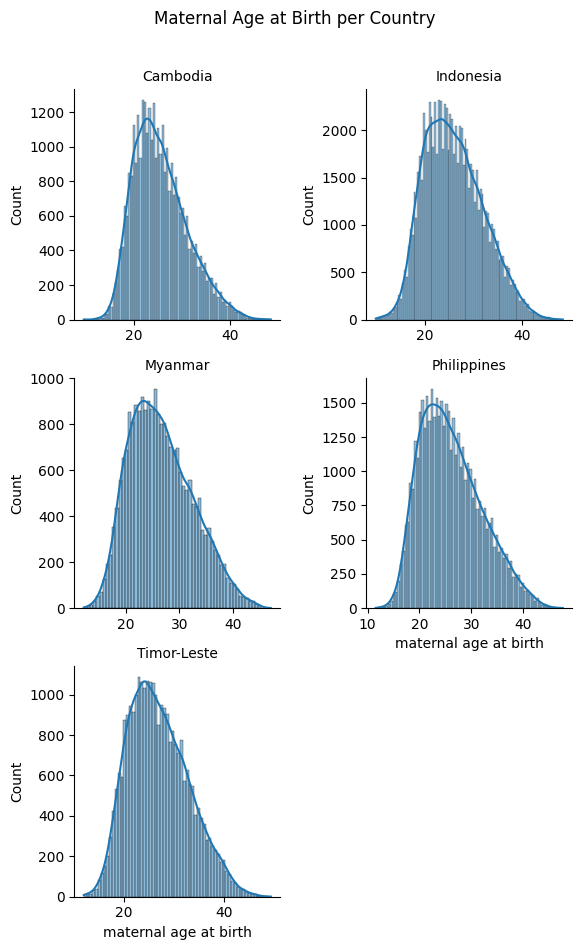

In [11]:
#item 1 - histogram and kernel density plot of maternal age at birth per country
a_1 = sb.FacetGrid(df, col = "country", col_wrap = 2, 
                   sharex = False, sharey = False)
a_1.map_dataframe(sb.histplot, x = "maternal age at birth", kde = True)
a_1.set_titles("{col_name}")
a_1.fig.suptitle("Maternal Age at Birth per Country", y = 1.05)

From the graphs above, it can be seen that the incidene of maternal age at birth across all the countries is similar. The likelihood of a mother giving birth from her 20's starts to rise and peaks at around the mid to late 20's. After that, the likelihood of a mother giving birth decreases.

Text(0.5, 1.0, 'Maternal Age at Birth per Country')

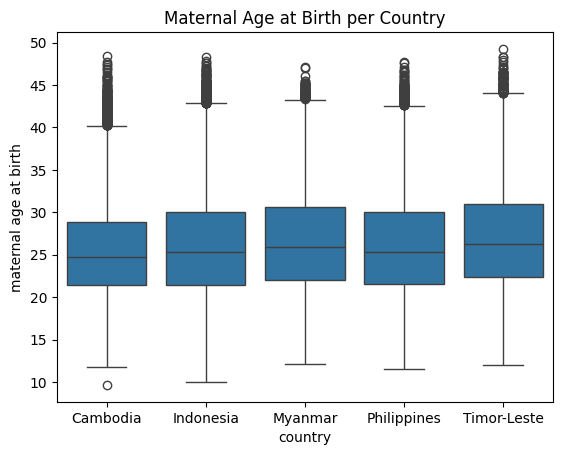

In [12]:
#item 2.1 - maternal age boxplots by country
sb.boxplot(x = df['country'], y = df['maternal age at birth'])
mp.title("Maternal Age at Birth per Country")

From the bocplots above it can once again be seen that the age that a mother gives birth at across all countries is similar. It can also be seen that the outliers for the older ages of the countries is similar. Cambodia also shows outliers of birth occuring below 10 years of age but at that age it is not an outlier for Indonesia while all other countries show no observation happening at that age.

Text(0.5, 1.0, 'Maternal Age at Birth by Residence Type')

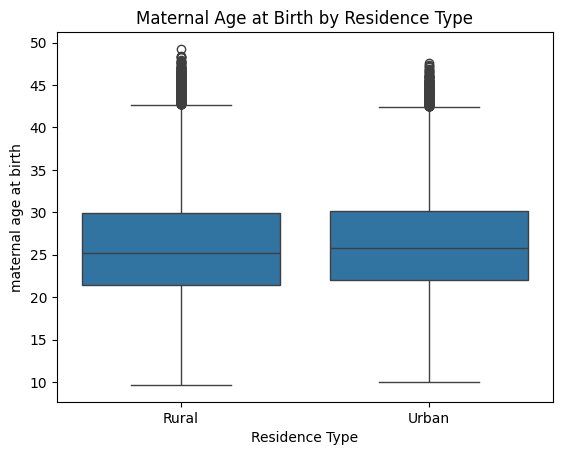

In [13]:
#item 2.2 - maternal age boxplots by urban/rural
sb.boxplot(x = df['Residence Type'], y = df['maternal age at birth'])
mp.title("Maternal Age at Birth by Residence Type")

Between Urban and Rural households, the maternal age is also very similar. However, the range for Urban maternal ages is a bit smaller compared to Rural indicating that there is a slightly smaller age window in which a mother gives birth in Urban households as compared to Rural households.

Text(0.5, 1.0, 'Educational Attainment per Country')

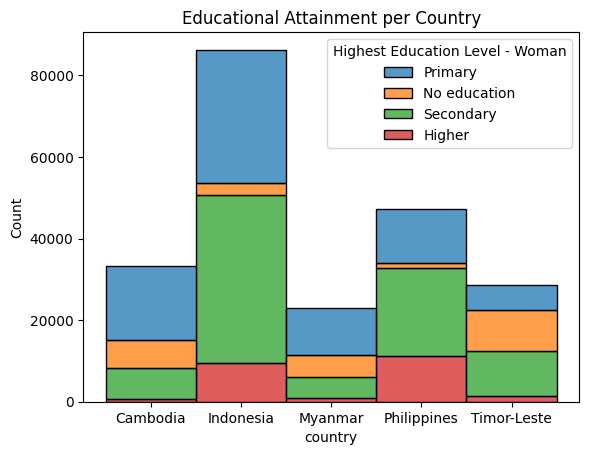

In [14]:
#item 3 - stacked bar chart of educational attainment by country
sb.histplot(data = df, x = 'country', hue = 'Highest Education Level - Woman',
            multiple = 'stack')
mp.title("Educational Attainment per Country")

From the bar chart above, it can be observed that Indonesia has the highest number of observations with the bulk of them having achieved primary or secondary education. The Philippines and Indonesia see the most amount of observations achieving secondary education, for Cambodia and Myanmar it is Primary edcuation and for Timor-Leste, it is no education. The Philippines also boasts the most amount of observations that achieve higher education.

<Axes: xlabel='Wealth Index Combined', ylabel='Highest Educational Level(numerical) - Woman'>

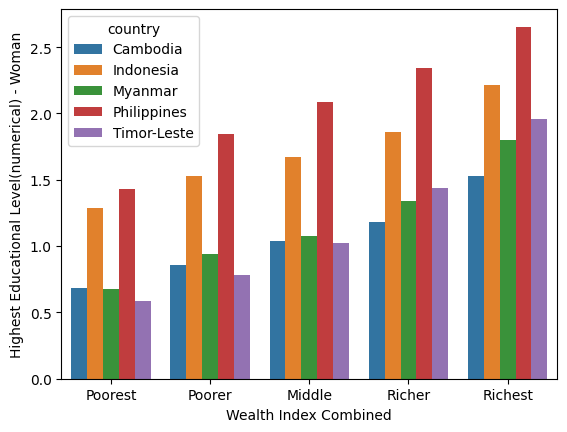

In [15]:
#item 4 - compute and plot mean education level by wealth quintile across countries
mean_educ = df.groupby(['country', 'Wealth Index Combined'])['Highest Educational Level(numerical) - Woman'].mean().reset_index()
sb.barplot(data = mean_educ, x = 'Wealth Index Combined', 
           y = 'Highest Educational Level(numerical) - Woman',
           hue = 'country',
           order = ["Poorest", "Poorer", "Middle", "Richer", "Richest"])

Across all quintiles, the Philippines boasts the highest educational attainment followed by Indonesia. Comparing from the table above that shows that Indonesia has the most amount of observations, this graph confirms that comparatively, the Filipino Mothers generally achieve higher levels of Education as compared to the rest of the countries.

Text(0.5, 1.05, 'Age-Education Density Plots')

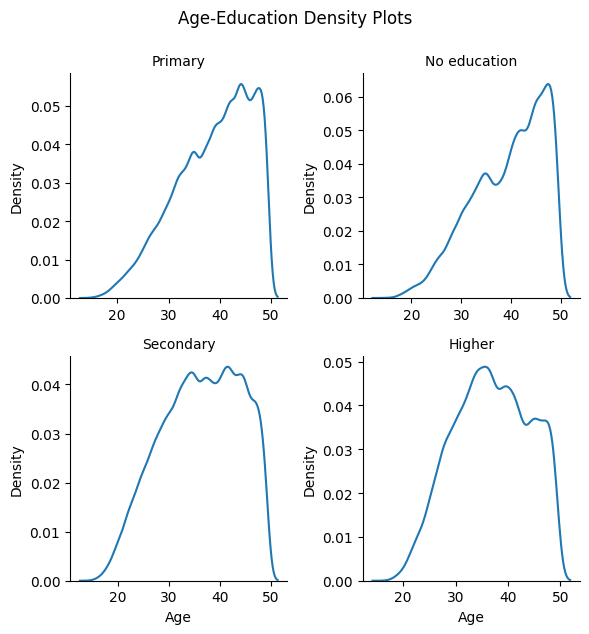

In [16]:
#item 5 - age-education profile density plots
a_1 = sb.FacetGrid(df, col = "Highest Education Level - Woman", col_wrap = 2, 
                   sharex = False, sharey = False)
a_1.map_dataframe(sb.kdeplot, x = "Age")
a_1.set_titles("{col_name}")
a_1.fig.suptitle("Age-Education Density Plots", y = 1.05)


It can be seen that despite the age of the observation, the observations can still have varied education. However, it can also be seen that people who achieve higher education are on the younger side as compared the people who don't implying that people are less likely to enter college later in life if they haven't already.

### B. Fertility and Birth Patterns
1. Plot **birth order distributions** across countries.  
2. Compute **mean birth order by mother’s age group** and plot as a line chart per country.  
3. Create a **heatmap** of mean birth order by education level and wealth quintile (pooled data).  
4. Plot **total number of births per woman** to visualize fertility variation.


<Axes: xlabel='Birth Order', ylabel='count'>

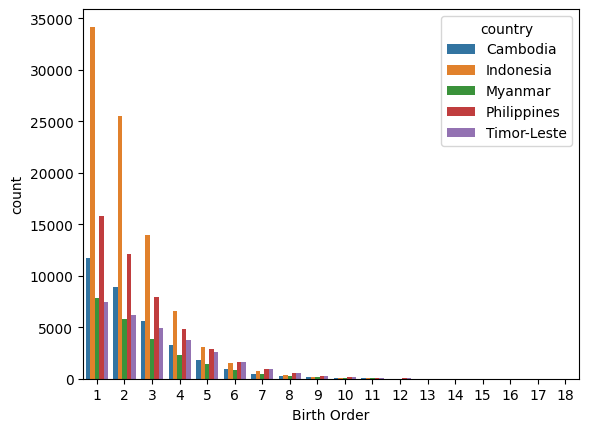

In [17]:
#item 1 = plot birth order distributions across countries
sb.countplot(data = df, x = 'Birth Order', hue = 'country')

From here, it can be seen that Indonesia sees the most amount of first borns, second borns, third borns, and even fifth borns. This is not surprising given that among all these countries, Indonesia boasts the largest population.

<Axes: xlabel='Age Group', ylabel='Birth Order'>

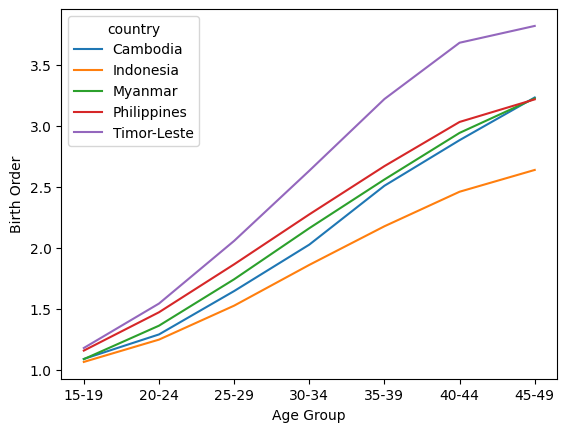

In [18]:
#item 2 = mean birth order by mother's age group as a line chart per country
mean_birth = df.groupby(['country', 'Age Group'])['Birth Order'].mean().reset_index()
sb.lineplot(data = mean_birth, x = 'Age Group', 
            y = 'Birth Order', 
            hue = 'country')

It can be seen here the Timor-Leste has the highest mean birth order while Indonesia has the lowest. It can be seen that despite seeing the most amount of births, Indonesia has the lowest fertility among all these countries and despite having comparably lower amounts of births than all the other countries, Timor-Leste has the highest fertility. Seeing the comparison of the mean birth order has allowed us to analyze the fertilities of these countries without things being blown out of proportion by their relative populations.

Text(0.5, 1.0, 'Birth Order-Education-Wealth Heatmap')

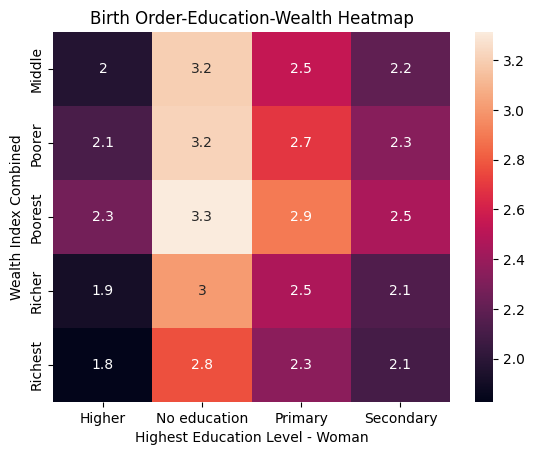

In [19]:
#item 3 - heatmap of mean birth order by education level and wealth quintile
mean_birth_2 = df.groupby(['Highest Education Level - Woman', 'Wealth Index Combined'])['Birth Order'].mean().reset_index()
mean_birth_2 = mean_birth_2.pivot_table(values = 'Birth Order', 
                                        index = 'Wealth Index Combined',
                                        columns = 'Highest Education Level - Woman')
sb.heatmap(mean_birth_2, annot = True)
mp.title("Birth Order-Education-Wealth Heatmap")

Being on the lower wealth quintiles generally means that mothers give birth more often. The same can also be said from having lower levels of education. Meanwhile, having higher levels of education and being on the higher wealth quintiles make it less likely that a mother gives birth more often.

Text(0.5, 1.0, 'Total Births per Woman')

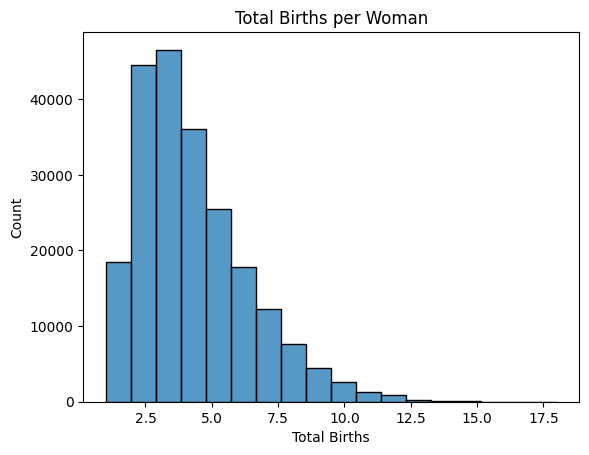

In [20]:
#item 4 - Plot for the total number of births per woman
sb.histplot(df, x = 'Total Births', bins = 18)
mp.title("Total Births per Woman")

Across all these countries, women tend to give birth around three times. However, after the third birth, the likelihood that they are to give birth to additional children starts to significantly drop.

### C. Health Service Utilization
1. Plot **average number of ANC visits** by country and by **urban/rural**.  
2. Compute the **share of births in health facilities** by country.  
3. Show a **grouped bar chart** comparing skilled birth attendance by wealth quintile and country.  
4. Scatter maternal age vs. ANC visits colored by residence (urban/rural).

Text(0.5, 1.0, 'Mean ANC Visits per Country')

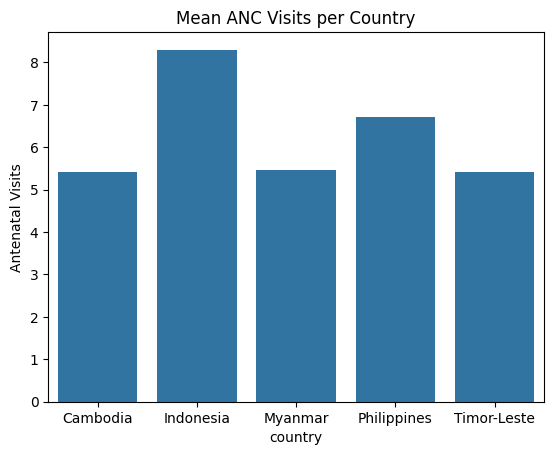

In [21]:
#Item 1.1 - Plot average number of ANC visits by country
mean_anc = df.groupby(['country'])['Antenatal Visits'].mean().reset_index()
sb.barplot(data = mean_anc, x = 'country', y = 'Antenatal Visits')
mp.title("Mean ANC Visits per Country")

Mothers from the Philippines and Indonesia generally make more ANC visits during pregnancy with Indonesia still having significantly more visits than the Philippines. The figure fro Cambodia, Myanmar, and Timor-Leste are similar to each other.

Text(0.5, 1.0, 'Mean ANC Visits by Urban/Rural')

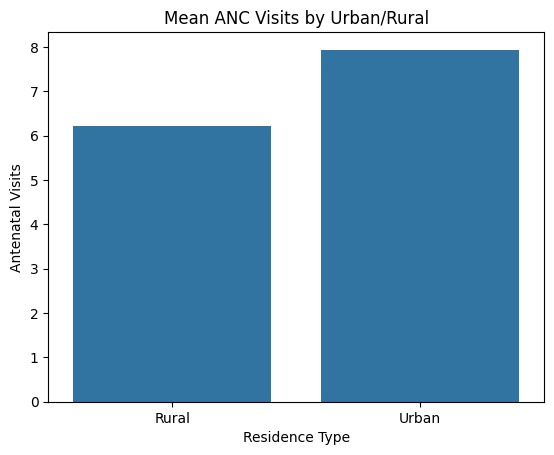

In [22]:
#Item 1.2 - Plot average number of ANC visits by Urban/Rural
mean_anc_2 = df.groupby(['Residence Type'])['Antenatal Visits'].mean().reset_index()
sb.barplot(data = mean_anc_2, x = 'Residence Type', y = 'Antenatal Visits')
mp.title("Mean ANC Visits by Urban/Rural")

Mothers from rural residences are significantly less likely than mother from urban residences to make ANC visits due to pregnancy. This could imply that healthcare services for pregnancy are less accessible in rural areas for these countries.

In [23]:
#Item 2 - Compute Share of Births in Health Facilities by country

#creating Place of Delivery dummy
df = pd.get_dummies(df, columns = ['Place of Delivery'])
df['Place of Delivery_Facility'] = df['Place of Delivery_Facility'].astype(int)
mean_place = df.groupby(['country'])['Place of Delivery_Facility'].mean().reset_index()
mean_place['Percentage of Births in Health Facilities'] = mean_place['Place of Delivery_Facility'] * 100
mean_place

,country,Place of Delivery_Facility,Percentage of Births in Health Facilities
0,Cambodia,0.176810,17.680985
1,Indonesia,0.152205,15.220541
2,Myanmar,0.071425,7.142546
3,Philippines,0.169736,16.973584
4,Timor-Leste,0.121853,12.185343


Births in these countries are generally low with all of them showing less than 20% of all births being delivered in health facilities, either public or private. Myanmar shows the worst utilization of health facilities for births, being the only country that has less than 10% of all births not being done in health facilities.

<Axes: xlabel='Wealth Index Combined', ylabel='count'>

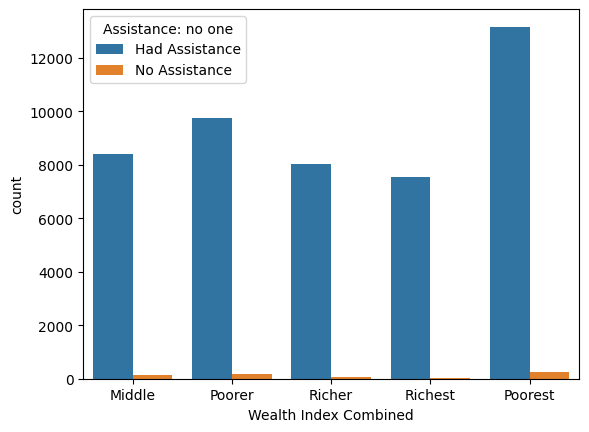

In [24]:
#Item 3.1 - Grouped bar chart comparing skilled birth attendance by wealth quintile
sb.countplot(data = df, x = 'Wealth Index Combined', hue = 'Assistance: no one')

All wealth quintiles across the countries seem to generally have good access to skilled birth attendance. It can also be observed that the poorest quintile has the most amount of skilled birth attendance which could possibly be explained by their higher fertility rates.

<Axes: xlabel='country', ylabel='count'>

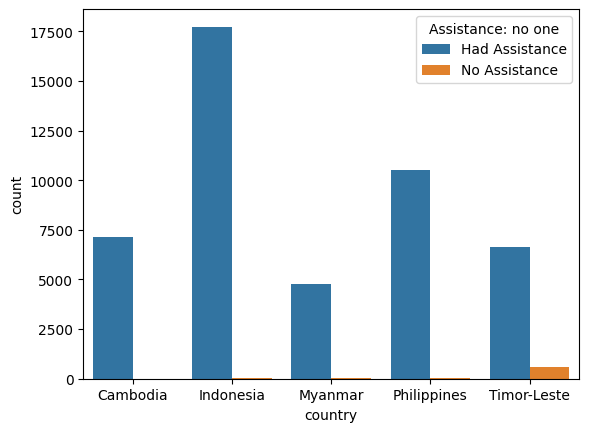

In [25]:
#Item 3.2 - Grouped bar chart comparing skilled birth attendance by country
sb.countplot(data = df, x = 'country', hue = 'Assistance: no one')

Most births from these countries had skilled attendance. However, Timor-Leste shows significantly more births as compared to all the other countries in births that did not have any assistance at all.

<Axes: xlabel='maternal age at birth', ylabel='Antenatal Visits'>

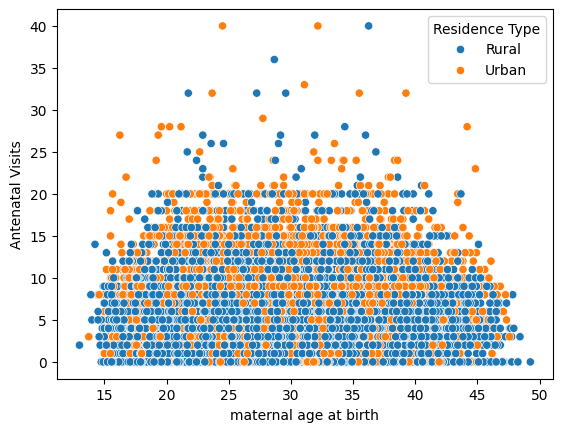

In [27]:
#Item 4 - Scatter maternal age vs ANC visits colored by urban/rural
df_c4 = df.reset_index(drop = True)
df_c4.loc[df_c4['Antenatal Visits'] == 98, 'Antenatal Visits'] = np.nan
df_c4.loc[df_c4['Antenatal Visits'] == 99, 'Antenatal Visits'] = np.nan
sb.scatterplot(data = df_c4, x = 'maternal age at birth', y = 'Antenatal Visits',
               hue = 'Residence Type')

ANC visits seem to be balanced in terms of maternal age at birth. However, observations from Urban areas generally show more ANC visits as compared to rural households.

### D. Child Survival Outcomes
1. Compute **infant survival rate** = mean × 100 for each country.  
2. Plot a **bar chart** of survival rate by country.  
3. Create a **heatmap** of survival rate by education and wealth .  
4. Plot survival probability by **maternal age group** to visualize age-related risk.  
5. Compare survival by place of delivery (facility vs. home).

In [28]:
#infant survival rate - B5 (child is alive), B6 (age at death)
#education - V106 (highest education level of woman)
#wealth - V190
#maternal age groupV011 (woman's date of birth CMC), b3 (date of birth per child of the woman)
    #to get maternal age = (b3-V011)/12
#place of delivery - M15 (place of delivery)

In [30]:
#item 1 - compute infant survival rate for each country
d1_dict = {'No': 0, 'Yes': 1}
df['Child is Alive'] = df['Child is Alive'].map(d1_dict)
d_1 = df.groupby(['country'])['Child is Alive'].mean().reset_index()
d_1['Infant Survival Rate'] = d_1['Child is Alive'] * 100
d_1

,country,Child is Alive,Infant Survival Rate
0,Cambodia,0.919916,91.991589
1,Indonesia,0.939025,93.902510
2,Myanmar,0.893471,89.347079
3,Philippines,0.964334,96.433410
4,Timor-Leste,0.943275,94.327453


The Philippies shows the highest infant survival rate at more than 96%. Meanwhile, Myanmar has the lowest infant survival rate at around 89% which is still pretty high.

<Axes: xlabel='country', ylabel='Infant Survival Rate'>

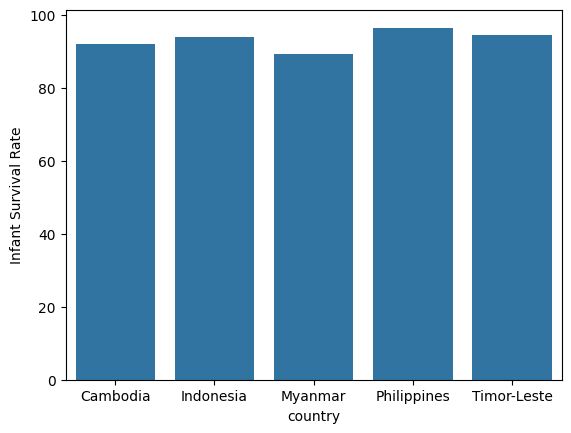

In [50]:
#item 2 - Plot Bar Chart of survival rate by country
sb.barplot(data = d_1, x = 'country', y = 'Infant Survival Rate')

This is just the graphical presentation of what has been said in the previous table. From thebar graphs, the difference between the highest infant survival rate (the Philippines) and the lowest (Myanmar), is much more visible.

<Axes: xlabel='Highest Education Level - Woman', ylabel='Wealth Index Combined'>

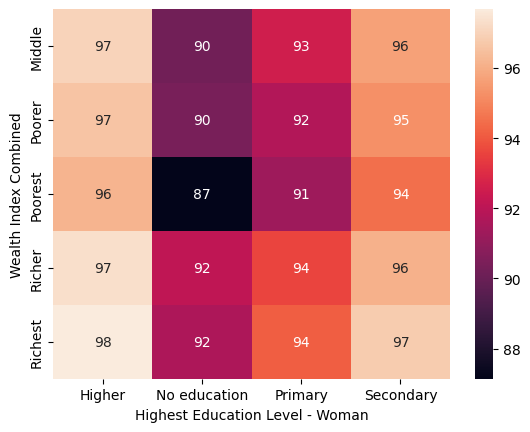

In [40]:
#item 3 - create heatmap of survial rate by education and wealth
d_3 = df.groupby(['Highest Education Level - Woman', 'Wealth Index Combined'])['Child is Alive'].mean().reset_index()
d_3['Infant Survival Rate'] = d_3['Child is Alive'] * 100
d_3 = d_3.pivot_table(values = 'Infant Survival Rate',
                      index = 'Wealth Index Combined',
                      columns = 'Highest Education Level - Woman')
sb.heatmap(d_3, annot = True)

Infant survival rate is fenerally th lowest for those at the poorest quintile and have received no education. It can also be seen that the Infant survival rate increases as educational attainment or wealth increases.

<Axes: xlabel='Age Group', ylabel='Infant Survival Rate'>

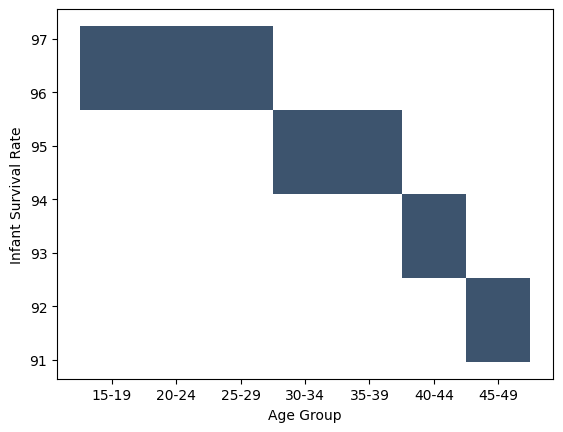

In [45]:
#item 4 - plot survival probability by maternal age group
d_4 = df.groupby(['Age Group'])['Child is Alive'].mean().reset_index()
d_4['Infant Survival Rate'] = d_4['Child is Alive'] * 100
sb.histplot(data = d_4, x = 'Age Group', y = 'Infant Survival Rate')

The infant survival rate is at the highest for births that occur from 15-29 years old and begins to decline after that. The older that a mother becomes, the lower the infant survival rate gets.

<Axes: xlabel='Place of Delivery_Home', ylabel='Infant Survival Rate'>

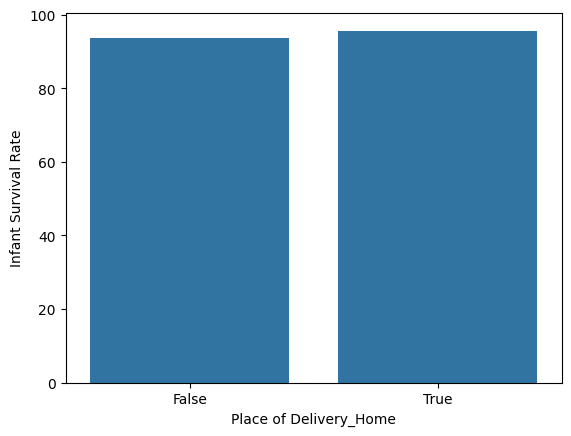

In [49]:
#item 5 - compare survival by place of delivery
d_5 = df.groupby(['Place of Delivery_Home'])['Child is Alive'].mean().reset_index()
d_5['Infant Survival Rate'] = d_5['Child is Alive'] * 100
sb.barplot(data = d_5, x = 'Place of Delivery_Home', y = 'Infant Survival Rate')

The infant survival rate is higher for births that occur at the home. However, the difference between the infant mortality rate that happens at home as opposed to the ones that happen at facilities does not differ much.

## Evaluation Criteria
Evaluation Rubric

| Component | Points |
|------------|--------|
| Data import, cleaning, and preparation | 15 |
| Variable engineering and weighting | 15 |
| Descriptive statistics | 15 |
| Visualization variety and design | 30 |
| Interpretation and narrative | 20 |
| Organization and readability | 5 |
| **Total** | **100** |